In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()

In [3]:
df = pd.read_excel('MUDACData.xls', )

In [4]:
df

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,...,HomeTeam_Player7_Name,HomeTeam_Player7_Position,HomeTeam_Player8_ID,HomeTeam_Player8_Name,HomeTeam_Player8_Position,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Additional_Information,Acquisition_Information
0,20000329,0,Wed,CHN,NL,1,NYN,NL,1,5,...,Todd Zeile,3,ordor001,Rey Ordonez,6,hampm001,Mike Hampton,1,NaN,Y
1,20000330,0,Thu,NYN,NL,2,CHN,NL,2,5,...,Jeff Huson,6,giraj001,Joe Girardi,2,farnk001,Kyle Farnsworth,1,NaN,Y
2,20000403,0,Mon,COL,NL,1,ATL,NL,1,0,...,Eddie Perez,2,weisw001,Walt Weiss,6,maddg002,Greg Maddux,1,NaN,Y
3,20000403,0,Mon,MIL,NL,1,CIN,NL,1,3,...,Aaron Boone,5,tuckm001,Michael Tucker,7,harnp001,Pete Harnisch,1,NaN,Y
4,20000403,0,Mon,SFN,NL,1,FLO,NL,1,4,...,Brant Brown,9,redmm001,Mike Redmond,2,ferna001,Alex Fernandez,1,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54340,20221005,0,Wed,KCA,AL,162,CLE,AL,162,2,...,Will Brennan,7,maill001,Luke Maile,2,stram002,Myles Straw,8,NaN,Y
54341,20221005,0,Wed,PHI,NL,162,HOU,AL,162,2,...,Jake Meyers,8,dubom001,Mauricio Dubon,6,maldm001,Martin Maldonado,2,NaN,Y
54342,20221005,0,Wed,ANA,AL,162,OAK,AL,162,2,...,Conner Capel,9,garcd004,Dermis Garcia,3,allen002,Nick Allen,6,NaN,Y
54343,20221005,0,Wed,DET,AL,162,SEA,AL,162,4,...,Abraham Toro,5,casac001,Curt Casali,2,crawj002,J.P. Crawford,6,NaN,Y


In [5]:
df.drop(df[df["Date"]<20100000].index, inplace = True)
df.drop(df.Date[20190000:20220000])
df

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,...,HomeTeam_Player7_Name,HomeTeam_Player7_Position,HomeTeam_Player8_ID,HomeTeam_Player8_Name,HomeTeam_Player8_Position,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Additional_Information,Acquisition_Information
24291,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
24292,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
24293,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
24294,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
24295,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54340,20221005,0,Wed,KCA,AL,162,CLE,AL,162,2,...,Will Brennan,7,maill001,Luke Maile,2,stram002,Myles Straw,8,NaN,Y
54341,20221005,0,Wed,PHI,NL,162,HOU,AL,162,2,...,Jake Meyers,8,dubom001,Mauricio Dubon,6,maldm001,Martin Maldonado,2,NaN,Y
54342,20221005,0,Wed,ANA,AL,162,OAK,AL,162,2,...,Conner Capel,9,garcd004,Dermis Garcia,3,allen002,Nick Allen,6,NaN,Y
54343,20221005,0,Wed,DET,AL,162,SEA,AL,162,4,...,Abraham Toro,5,casac001,Curt Casali,2,crawj002,J.P. Crawford,6,NaN,Y


In [6]:
mapping = {
    'Mon' : 1,
    'Tue' : 2,
    'Wed' : 3,
    'Thu' : 4,
    'Fri' : 5,
    'Sat' : 6,
    'Sun' : 7
}

df['DOW'] = df['DayofWeek'].replace(mapping)
df.head()

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,...,HomeTeam_Player7_Position,HomeTeam_Player8_ID,HomeTeam_Player8_Name,HomeTeam_Player8_Position,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Additional_Information,Acquisition_Information,DOW
24291,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y,7
24292,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y,1
24293,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y,1
24294,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y,1
24295,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y,1


In [7]:
mapping = {
    'NYA' : 1,
    'LAN' : 2,
    'BOS' : 3,
    'CHN' : 4,
    'SFN' : 5,
    'NYN' : 6,
    'SLN' : 7,
    'PHI' : 8,
    'ANA' : 9,  
    'ATL' : 10, 
    'TEX' : 11,
    'WAS' : 12,
    'HOU' : 13,
    'TOR' : 14,
    'CHA' : 15,
    'SEA' : 16,
    'SDN' : 17,
    'DET' : 18,
    'MIN' : 19,
    'COL' : 20,
    'ARI' : 21, 
    'BAL' : 22, 
    'PIT' : 23,
    'CLE' : 24,
    'MIL' : 25,
    'CIN' : 26,
    'OAK' : 27,
    'KCA' : 28,
    'TBA' : 29,
    'MIA' : 30,
    'FLO' : 31,
    'MON' : 32,
}
df['Rank'] = df['VisitingTeam'].replace(mapping)
df.head(5)

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,...,HomeTeam_Player8_ID,HomeTeam_Player8_Name,HomeTeam_Player8_Position,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Additional_Information,Acquisition_Information,DOW,Rank
24291,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y,7,1
24292,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y,1,19
24293,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y,1,24
24294,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y,1,18
24295,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y,1,16


In [20]:
mapping = {
    'NYA' : 1197,
    'LAN' : 1925,
    'BOS' : 1390,
    'CHN' : 409,
    'SFN' : 1977,
    'NYN' : 1197,
    'SLN' : 560,
    'PHI' : 1167,
    'ANA' : 1919,  
    'ATL' : 1127, 
    'TEX' : 1120,
    'WAS' : 1103,
    'HOU' : 1178,
    'TOR' : 932,
    'CHA' : 409,
    'SEA' : 1656,
    'SDN' : 1987,
    'DET' : 698,
    'MIN' : 0,
    'COL' : 977,
    'ARI' : 1690, 
    'BAL' : 1109, 
    'PIT' : 868,
    'CLE' : 751,
    'MIL' : 337,
    'CIN' : 708,
    'OAK' : 1971,
    'KCA' : 437,
    'TBA' : 1581,
    'MIA' : 1759,
    'FLO' : 1581,
    'MON' : 1242,
}
df['DistanceRank'] = df['VisitingTeam'].replace(mapping)
df.head(5)

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,...,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Additional_Information,Acquisition_Information,DOW,Rank,VisitingLeague,DN,DistanceRank
24291,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,scutm001,Marco Scutaro,6,NaN,Y,7,1,0,1,1197
24292,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,mathj001,Jeff Mathis,2,NaN,Y,1,19,0,1,0
24293,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,ramia003,Alexei Ramirez,6,NaN,Y,1,24,0,0,751
24294,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,getzc001,Chris Getz,4,NaN,Y,1,18,0,0,698
24295,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,pennc001,Cliff Pennington,6,NaN,Y,1,16,0,1,1656


In [21]:
mapping = {
    'AL' : 0,
    'NL' : 1
}
df['VisitingLeague'] = df['VisitingTeamLeague'].replace(mapping)

In [22]:
mapping = {
    'D' : 0,
    'N' : 1
}
df['DN'] = df['DayNight'].replace(mapping)
df.head(5)

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,...,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Additional_Information,Acquisition_Information,DOW,Rank,VisitingLeague,DN,DistanceRank
24291,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,scutm001,Marco Scutaro,6,NaN,Y,7,1,0,1,1197
24292,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,mathj001,Jeff Mathis,2,NaN,Y,1,19,0,1,0
24293,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,ramia003,Alexei Ramirez,6,NaN,Y,1,24,0,0,751
24294,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,getzc001,Chris Getz,4,NaN,Y,1,18,0,0,698
24295,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,pennc001,Cliff Pennington,6,NaN,Y,1,16,0,1,1656


In [23]:
dfMINa = df[df['VisitingTeam'].str.contains('MIN')]

In [24]:
dfMINh = df[df['HomeTeam'].str.contains('MIN')]
dfMINh.head(5)

,Date,NumberofGames,DayofWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VistingTeamScore,...,HomeTeam_Player9_ID,HomeTeam_Player9_Name,HomeTeam_Player9_Position,Additional_Information,Acquisition_Information,DOW,Rank,VisitingLeague,DN,DistanceRank
24386,20100412,0,Mon,BOS,AL,7,MIN,AL,8,2,...,puntn001,Nick Punto,5,NaN,Y,1,3,0,0,1390
24407,20100414,0,Wed,BOS,AL,8,MIN,AL,9,6,...,puntn001,Nick Punto,5,NaN,Y,3,3,0,0,1390
24420,20100415,0,Thu,BOS,AL,9,MIN,AL,10,0,...,puntn001,Nick Punto,5,NaN,Y,4,3,0,0,1390
24433,20100416,0,Fri,KCA,AL,10,MIN,AL,11,3,...,harrb001,Brendan Harris,5,NaN,Y,5,28,0,1,437
24448,20100417,0,Sat,KCA,AL,11,MIN,AL,12,5,...,harrb001,Brendan Harris,5,NaN,Y,6,28,0,0,437


In [15]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

df.dropna(subset=['Attendance'], axis = 0, inplace = True)
dfMINh.dropna(subset=['Attendance'], axis = 0, inplace = True)

/var/folders/s9/3_f6t5092mvg4rwtp4v31vvh0000gp/T/ipykernel_39723/3530280838.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMINh.dropna(subset=['Attendance'], axis = 0, inplace = True)


In [44]:
#X = df[['Date', 'NumberofGames', 'VisitingTeamGameNumber', 'HomeTeamGameNumber', 'VistingTeamScore', 'HomeTeamScore', 'NumberofOuts', 'DN', 'LengthofGame', 'VisitingTeamOffense_AtBats', 'VisitingTeamOffense_Hits', 'VisitingTeamOffense_Doubles', 'VisitingTeamOffense_Triples', 'VisitingTeamOffense_Homeruns', 'VisitingTeamOffense_RBIs', 'VisitingTeamOffense_SacrificeHits', 'VisitingTeamOffense_SacrificeFlies', 'VisitingTeamOffense_HitbyPitch', 'VisitingTeamOffense_Walks', 'VisitingTeamOffense_IntentionalWalks', 'VisitingTeamOffense_Strickouts', 'VisitingTeamOffense_StolenBases', 'VisitingTeamOffense_CaughtStealing', 'VisitingTeamOffense_GroundedintoDoublePlay', 'VisitingTeamOffense_AwardedFirstonCatcherInterference', 'VisitingTeamOffense_LeftOnBase', 'VisitingTeamPitchers_PitchersUsed', 'VisitingTeamPitchers_IndividualEarnedRuns', 'VisitingTeamPitchers_TeamEarnedRuns', 'VisitingTeamPitchers_WildPitches', 'VisitingTeamPitchers_Balks', 'VisitingTeamDefense_PutOuts', 'VisitingTeamDefense_Assists', 'VisitingTeamDefense_Errors', 'VisitingTeamDefense_PassedBalls', 'VisitingTeamDefense_DoublePlays', 'VisitingTeamDefense_TriplePlays', 'HomeTeamOffense_AtBats', 'HomeTeamOffense_Hits', 'HomeTeamOffense_Doubles', 'HomeTeamOffense_Triples', 'HomeTeamOffense_Homeruns', 'HomeTeamOffense_RBIs', 'HomeTeamOffense_SacrificeHits', 'HomeTeamOffense_SacrificeFlies', 'HomeTeamOffense_HitbyPitch', 'HomeTeamOffense_Walks', 'HomeTeamOffense_IntentionalWalks', 'HomeTeamOffense_Strickouts', 'HomeTeamOffense_StolenBases', 'HomeTeamOffense_CaughtStealing', 'HomeTeamOffense_GroundedintoDoublePlay', 'HomeTeamOffense_AwardedFirstonCatcherInterference', 'HomeTeamOffense_LeftOnBase', 'HomeTeamPitchers_PitchersUsed', 'HomeTeamPitchers_IndividualEarnedRuns', 'HomeTeamPitchers_TeamEarnedRuns', 'HomeTeamPitchers_WildPitches', 'HomeTeamPitchers_Balks', 'HomeTeamDefense_PutOuts', 'HomeTeamDefense_Assists', 'HomeTeamDefense_Errors', 'HomeTeamDefense_PassedBalls', 'HomeTeamDefense_DoublePlays', 'HomeTeamDefense_TriplePlays', 'DOW', 'Rank', 'VisitingLeague']]
#X = dfMINh[['Date', 'NumberofGames', 'VisitingTeamGameNumber', 'HomeTeamGameNumber', 'VistingTeamScore', 'HomeTeamScore', 'NumberofOuts', 'DN', 'LengthofGame', 'VisitingTeamOffense_AtBats', 'DOW', 'Rank', 'VisitingLeague']]
#65937547 X = dfMINh[['Date', 'DOW']]
#61928840 X = dfMINh[['Date', 'DN']]
#X = dfMINh[['Date']]
#108529092X = dfMINh[['DOW']]
#51423757 X = dfMINh[['DOW', 'DN']]
#X = dfMINh[['DOW', 'DN', 'Rank']]
#X = dfMINh[['DOW', 'DN', 'LengthofGame']]
X = dfMINh[['Date','NumberofGames','DOW', 'DN', 'Rank', 'HomeTeamGameNumber', 'DistanceRank']]
#144469397
#79918231
#Milwaukee, Detroit, Cleveland, Toronto(only one Canada team)
y = dfMINh['Attendance']

In [103]:
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestClassifier(n_estimators = 500, random_state = 40)
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_pred,y_test)))

5463.903557169661


<BarContainer object of 98 artists>

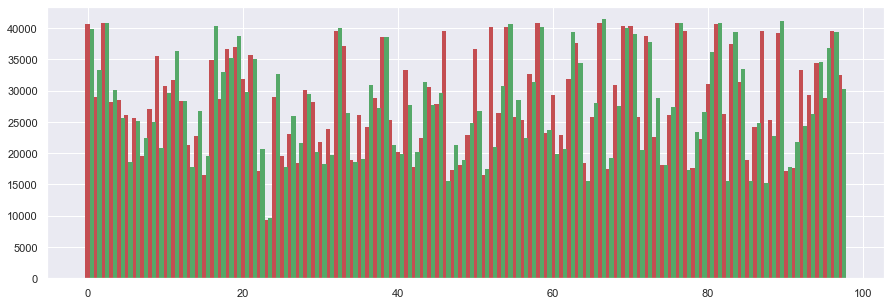

In [92]:
fig, ax = plt.subplots(figsize=(15, 5))

barWidth = 0.55
x = np.arange(0,len(y_pred)) 
br1 = np.arange(0,len(y_pred))
br2 = [x + barWidth for x in br1]


plt.bar(br1, height = y_pred, color = 'r', width = barWidth, edgecolor = 'none')
plt.bar(br2, height = y_test, color = 'g', width = barWidth, edgecolor = 'none')

In [957]:
#Team 1 (Dances With Data): Alex B, Tony, Annie, Jack Callinan, RJ
#Team 2 (Good Data Hunting): Ben Ribar, Jack Allenburg, Drake Rega, Callais, Elizabeth

In [15]:
df2020 = dfMINh.drop(dfMINh[dfMINh["Date"]<20220000].index)

In [16]:
df2020.to_csv('RJData')

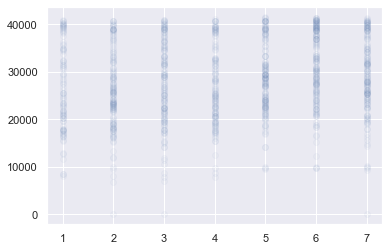

In [964]:
plt.scatter(dfMINh['DOW'], dfMINh['Attendance'], alpha = 0.03)

In [24]:
df2011 = dfMINh.drop(dfMINh[dfMINh["Date"]<20110000].index)
df2011 = dfMINh.drop(dfMINh[dfMINh["Date"]> 20120000].index)
df2011.to_csv('2011TwinsHomeGames.csv')

In [104]:
dfMINh['Date'] = pd.to_datetime(dfMINh['Date'], format= '%Y%m%d')

/var/folders/s9/3_f6t5092mvg4rwtp4v31vvh0000gp/T/ipykernel_39723/338011062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMINh['Date'] = pd.to_datetime(dfMINh['Date'], format= '%Y%m%d')


In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=dfMINh, x="Date", y="Attendance", hue="DistanceRank", linewidth = 0.1, capsize=.4, edgecolor="1", ax=ax)

<AxesSubplot:xlabel='Date', ylabel='Attendance'>